In [61]:
import pandas as pd
import altair as alt
import plotly.express as px
import datetime
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'iframe'
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('world-happiness-report-2021.csv')

In [20]:
region_df = df.groupby(['Regional indicator'])['Ladder score', 'Logged GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption'].mean()

In [21]:
region_df = region_df.round({'Ladder score' : 3 , 'Logged GDP per capita': 3, 'Healthy life expectancy':3, 'Social support': 3, 'Freedom to make life choices': 3, 'Perceptions of corruption': 3})
region_df = region_df.rename(columns={'Ladder score' : 'Happiness Score', 'Healthy life expectancy': 'Life Expectancy', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption','Logged GDP per capita': 'GDP'})
region_df.head()

,Happiness Score,GDP,Life Expectancy,Social support,Freedom,Corruption
Regional indicator,,,,,,
Central and Eastern Europe,5.985,10.109,68.338,0.887,0.797,0.851
Commonwealth of Independent States,5.467,9.402,65.009,0.872,0.817,0.725
East Asia,5.810,10.368,71.252,0.860,0.764,0.683
Latin America and Caribbean,5.908,9.370,67.076,0.839,0.832,0.793
Middle East and North Africa,5.220,9.666,65.609,0.798,0.716,0.762


In [24]:
region_df['Region'] = region_df.index

In [89]:
chart = alt.Chart(region_df, title='GDP vs Happiness by Region').mark_point().encode(
    x='GDP',
    y='Happiness Score',
    color='Region',
    tooltip=['Region', 'Happiness Score', 'GDP']
)
chart.show()

Displaying chart at http://localhost:22420/


KeyboardInterrupt: 

In [26]:
alt.Chart(region_df, title='Life Expectancy vs Happiness by Region').mark_point().encode(
    x='Life Expectancy',
    y='Happiness Score',
    color='Region',
    tooltip=['Region', 'Happiness Score', 'Life Expectancy']
)

alt.Chart(...)

In [29]:
alt.Chart(region_df, title='Freedom vs Happiness by Region').mark_point().encode(
    x='Freedom',
    y='Happiness Score',
    color='Region',
    tooltip=['Region', 'Happiness Score', 'Freedom']
)

alt.Chart(...)

In [30]:
alt.Chart(region_df, title='Corruption vs Happiness by Region').mark_point().encode(
    x='Corruption',
    y='Happiness Score',
    color='Region',
    tooltip=['Region', 'Happiness Score', 'Corruption']
)

alt.Chart(...)

In [60]:
alt.Chart(region_df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Region',
    tooltip = ['Region', 'Happiness Score', alt.X(alt.repeat("column"), type='quantitative')]
).properties(
    width=150,
    height=150
).repeat(
    column=['GDP', 'Life Expectancy', 'Social support', 'Freedom', 'Corruption'],
    row=['Happiness Score']
).interactive()

alt.RepeatChart(...)

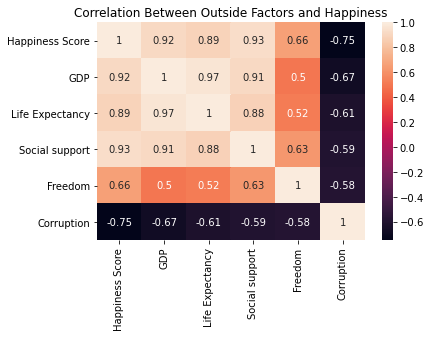

In [55]:
corr_matrix = region_df.corr()
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title('Correlation Between Outside Factors and Happiness')
plt.show()


In [65]:
year_df = pd.read_csv('world-happiness-report.csv')
year_df['year'] = pd.to_datetime(year_df['year'], format='%Y')
year_df = year_df[(year_df['Country name'] == 'United States') | (year_df['Country name'] == 'India')  | (year_df['Country name'] == 'China')  | (year_df['Country name'] == 'Indonesia')
                  | (year_df['Country name'] == 'Pakistan')  | (year_df['Country name'] == 'Brazil')  | (year_df['Country name'] == 'Nigeria')  | (year_df['Country name'] == 'Bangladesh')| (year_df['Country name'] == 'Russia')
                  | (year_df['Country name'] == 'Mexico')]
year_df = year_df.rename(columns={'year': 'Year', 'Life Ladder': 'Happiness Score'})
year_df['Year'] = pd.to_datetime(year_df['Year'], format='%Y')
year_df = year_df.rename({'Country name': 'Country'})
year_df['Country'] = year_df['Country name']

In [67]:
alt.Chart(year_df, title='Happiness Score by Year for 10 Most Populous Countries').mark_line().encode(
    x='Year',
    y='Happiness Score',
    color='Country',
    strokeDash='Country',
    tooltip = ['Country', 'Happiness Score', 'Year']
    
)

alt.Chart(...)

In [ ]:
fig = px.choropleth(locations=df['Country name'], 
                    locationmode="country names",
                    color=df['Ladder score'],
                    title="Happiness Score by Country",
                    height = 800,
                    labels ={'color': 'Happiness Score', 'locations': 'Country'}
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Country'})
fig.show()

In [84]:
pio.write_html(fig, file='happiness.html', auto_open=True)
IFrame(src='happiness.html', width=1000, height=800)

In [76]:
life_df = pd.DataFrame()
life_df['Country'] = df['Country name'] 
life_df['Life Expectancy'] = df['Healthy life expectancy']

In [ ]:
fig1 = px.choropleth(locations=life_df['Country'], 
                    locationmode="country names",
                    color=life_df['Life Expectancy'],
                    title="Life Expectancy by Country",
                    height = 800,
                    labels ={'color': 'Life Expectancy', 'locations': 'Country'}
                   )
fig1.update_layout({'legend_orientation':'v'})
fig1.update_layout({'legend_title':'Country'})
fig1.show()

In [87]:
import plotly.io as pio
pio.write_html(fig1, file='life.html', auto_open=False)

In [88]:
from IPython.display import IFrame
IFrame(src='life.html', width=1000, height=800)

In [68]:
worst_df = df.sort_values('Ladder score', ascending=True)
worst_df = worst_df.head(20)

In [79]:
chart = alt.Chart(worst_df, title='How Do the 20 Unhappiest Countries Compare To the International Average?').mark_bar().encode(
    x=alt.X('Country name', title='Country'),
    y=alt.Y('Ladder score', title='Happiness Score'))
rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(Ladder score)'
)
(chart + rule)

alt.LayerChart(...)

In [71]:
chart = alt.Chart(worst_df, title='How Do the 20 Unhappiest Countries Compare To the International Average?').mark_bar().encode(
    x=alt.X('Country name', title='Country'),
    y=alt.Y('Healthy life expectancy', title='Life Expectancy'))
rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(Healthy life expectancy)'
)
(chart + rule)

alt.LayerChart(...)

In [73]:
chart = alt.Chart(worst_df, title='How Do the 20 Unhappiest Countries Compare To the International Average?').mark_bar().encode(
    x=alt.X('Country name', title='Country'),
    y=alt.Y('Perceptions of corruption', title='Corruption Level'))
rule = alt.Chart(df).mark_rule(color='red').encode(
    y='mean(Perceptions of corruption)'
)
(chart + rule)

alt.LayerChart(...)